In [1]:
from aequilibrae import Project

from functions.get_state_borders import state_borders
from functions.export_states import export_states_to_project
from functions.open_states import open_states
from functions.remove_islands import remove_islands
from functions.hex_builder import hex_builder
from functions.zones_with_location import zones_with_location
from functions.zones_with_pop import zones_with_population
from functions.export_hex_population import export_hex_population
from functions.load_hexbins import load_hexbins
from functions.create_clusters import create_clusters
from functions.export_zones import export_zones

In [2]:
model_fldr = r'/home/jovyan/workspace/road_analytics/Andorra'

In [3]:
project = Project()
project.open(model_fldr)

## Let's get all parishes from Andorra

In [4]:
#If you have never analyzed the states in the project country, remove the commentary from the following lines

#country_name = "Andorra"
#states_wkb, dict_of_states = state_borders(country_name)
#export_states_to_project(states, dict_of_states, project)

In [5]:
#Otherwise, if you have already exported states to your project, then continue here
states = open_states(project)

/srv/conda/envs/saturn/lib/python3.9/site-packages/pandas/core/internals/construction.py:622: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  raw_lengths.append(len(val))
/srv/conda/envs/saturn/lib/python3.9/site-packages/pandas/core/construction.py:566: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data = list(data)
/srv/conda/envs/saturn/lib/python3.9/site-packages/pandas/core/construction.py:566: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  data = list(data)


## Let's get rid of all islands

In [6]:
#If your country has many islands, and you want to get rid of them, then remove the comentary from the following line and insteade of states, you will continue
#with no_islands
#no_island = remove_islands(states)

In [7]:
#As Andorra has no islands, we can continue with states
mlnd = states.to_crs('epsg:3405')
minx, miny, maxx, maxy = mlnd.unary_union.bounds

## Create Hex Bins

In [8]:
%%time
# size_parameter was determined empirically to not allow any hex bin with more than 10k people and be sufficiently small to allow for clusterings per district
size_parameter = 200
hexb = hex_builder(maxx, minx, maxy, miny, size_parameter, epsg=3405, coverage_area=mlnd)
# hexb = hex_builder(maxx, minx, maxy, miny, size_parameter, epsg=4326)
hexb.to_crs('epsg:4326', inplace=True)
#hexb.shape[0]

Expect 46,945 total hexbins for this bounding box
CPU times: user 11.8 s, sys: 109 ms, total: 11.9 s
Wall time: 11.9 s


In [9]:
zones_locations = zones_with_location(hexb, states)

## Compute the population for each HexBin

In [10]:
zones_pop = zones_with_population(model_fldr, zones_locations)

## Save the model hexbins

In [11]:
#If you have not previously saved your project, uncomment the line below
#export_hex_population(project, zones_with_pop)

## Initializes centroids

In [12]:
hexbins = load_hexbins(project)

<AxesSubplot:>

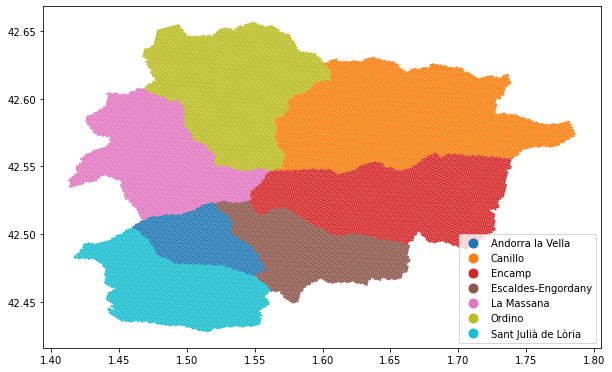

In [13]:
hexbins.plot(column='state', legend=True, legend_kwds={'loc': 'lower right'}, figsize=(10,8))

## Break the centroids

In [14]:
#By default, the function create_clusters already has default values for the parameters max_zone_size and 
#min_zone_size, but the user can change its values if needed.
zoning = create_clusters(hexbins, max_zone_size=9_000)

Done 0/7 states


/srv/conda/envs/saturn/lib/python3.9/site-packages/libpysal/weights/_contW_lists.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(_get_boundary_points(part.boundary) for part in shape)))
/srv/conda/envs/saturn/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)
/srv/conda/envs/saturn/lib/python3.9/site-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


<AxesSubplot:>

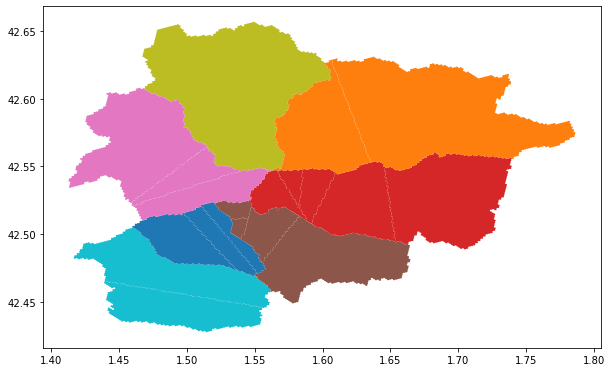

In [15]:
zoning.plot(column='state', figsize=(10,8))

## Saves hexbins with zones

In [16]:
#export_zones(zoning, project)